In [7]:
# pip install cufflinks
#pip install pmdarima

In [7]:

import pmdarima as pm
import numpy as np
from matplotlib import pyplot as plt
import pandas as pd

import cufflinks as cf
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
init_notebook_mode(connected=True)
import plotly.graph_objs as go
import matplotlib.cm as cm

from statsmodels.tsa.stattools import acf
from statsmodels.tsa.seasonal import seasonal_decompose
import seaborn as sns
import math

from dateutil.relativedelta import relativedelta
from datetime import datetime

from random import sample

import pmdarima as pm

In [8]:
#Define ACF plot with 95% statistical signficance level
def acfPlot(dataIn):
    dataAcf = pd.DataFrame(acf(dataIn))[1:]
    signLevel = 2 / math.sqrt(len(dataAcf))
    ax = sns.barplot(x=dataAcf.index[range(len(dataAcf))], y = dataAcf.iloc[:,0], color = "black",)
    plt.axhline(signLevel, color='r', linestyle = '--')
    plt.axhline(-signLevel, color='r', linestyle = '--')
    ax.set(xlabel='lag', ylabel='ACF')

In [9]:
#Define seasonplot function for Python using cufflinks and plotly
def seasonplot(dataIn, x_period):
    traces = []

    colors = cm.rainbow(np.linspace(0, 1, dataIn.index.year.nunique()), bytes = True)
    colorsRgb = ["rgb(" + str(x[0]) + "," + str(x[1]) + "," + str(x[2]) + "," + str(x[3]) + ")" for x in colors]

    yearCount = 0
    for year in dataIn.index.year.unique():
        if x_period == "month":
            x = dataIn.index.month[dataIn.index.year == year]
        elif x_period == "quarter":
            x = dataIn.index.quarter[dataIn.index.year == year]
        assert (x.nunique() == len(x)), "Non-unique y-values for each x-value.  Edit data or try increasing the granularity of x_period."

        y = dataIn.iloc[:,0][dataIn.index.year == year]
        traces.append(
            go.Scatter(
                x = x,
                y = y,
                mode = 'lines',
                connectgaps = True, 
                line = {
                        "color": colorsRgb[yearCount],
                        "width": 2
                       },
                name = year
            )
        )
        yearCount = yearCount + 1

    fig = go.Figure(data=traces)
    return(fig)

In [10]:
#Australian anti-diabetic drug sales example
a10 = pd.read_csv("a10.csv", index_col = 0)
a10.index = pd.to_datetime(a10.index)
iplot(a10.iplot(title="Anti-diabetic Drug Sales", yTitle = "$ Millions", asFigure=True))

In [11]:
#Seasonality plot of Australian anti-diabetic drug sales
iplot(seasonplot(a10, "month"))

In [12]:
#New one-family houses in the US Example
hsales = pd.read_csv("hsales.csv", index_col = 0)
iplot(hsales.iplot(title="Sales of new one-family houses, USA", yTitle = "Millions", asFigure=True))

<ipython-input-13-be3bbad88d2a>:1: FutureWarning:

the 'freq'' keyword is deprecated, use 'period' instead



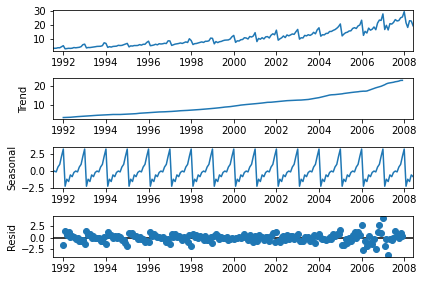

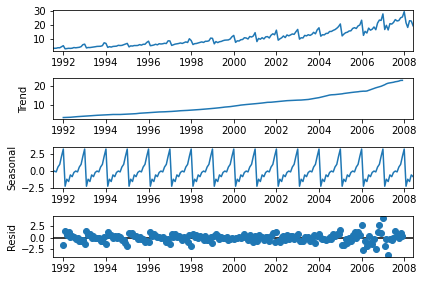

In [13]:
decomp = seasonal_decompose(a10, freq = 12)
decomp.plot()

In [14]:
#Guinea Rice Production
guinea = pd.read_csv("guinearice.csv", index_col = 0)
guinea.index = pd.to_datetime(guinea.index)
iplot(guinea.iplot(title="Rice Production in Guinea", yTitle = "Millions of Metric Tons", asFigure=True))

<AxesSubplot:>

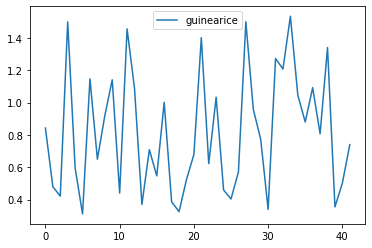

In [15]:
#Guinea Rice Production (shuffled)
guinea_shuffled = guinea.iloc[sample(range(guinea.shape[0]), guinea.shape[0])]
guinea_shuffled.reset_index(drop=True, inplace=True)
guinea_shuffled.plot()

In [16]:
#Australian beer sales
beer = pd.read_csv("beer.csv", index_col = 0)
beer.index = pd.to_datetime(beer.index)
iplot(beer.iplot(title="Beer Production in Australia", yTitle = "Megaliters", asFigure=True))

In [ ]:
#Australian beer sales autocorrelation
acfPlot(beer)

In [18]:
#Exploring stationarity, trends and cycles in example time series
#

In [ ]:
#ACFs for 200 days of Google stock price
goog200 = pd.read_csv("goog200.csv", index_col = 0)
acfPlot(goog200)

In [ ]:
#We note how one-differenced prices show no statistical sign of autocorrelation
goog200Diff = goog200.diff()[1:]
acfPlot(goog200Diff)

In [21]:
#Differencing example
#For this, look at the lecture slides.

In [22]:
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
init_notebook_mode(connected=True)
air_passengers = pd.read_csv("AirPassengers.csv", index_col=0)
iplot(air_passengers.iplot(title="Monthly totals of international airline passengers, 1949 to 1960", 
                     yTitle = "Number of passengers (1000s)", asFigure=True))

<ipython-input-23-1c7206ede82f>:1: FutureWarning:

the 'freq'' keyword is deprecated, use 'period' instead



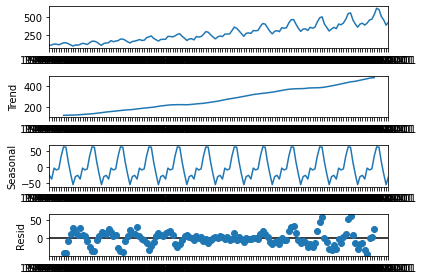

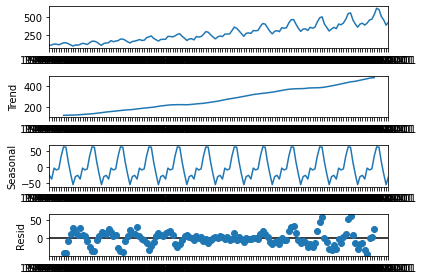

In [23]:
decomp = seasonal_decompose(air_passengers, freq = 12)
decomp.plot()

In [ ]:
acfPlot(air_passengers)

In [25]:
fit = pm.auto_arima(air_passengers, seasonal=True, 
                    stepwise=True, error_action="ignore", 
                    m=12, max_order=6)
print(fit.summary())

                                      SARIMAX Results                                      
Dep. Variable:                                   y   No. Observations:                  144
Model:             SARIMAX(2, 1, 1)x(0, 1, [], 12)   Log Likelihood                -504.923
Date:                             Tue, 18 May 2021   AIC                           1017.847
Time:                                     10:15:53   BIC                           1029.348
Sample:                                          0   HQIC                          1022.520
                                             - 144                                         
Covariance Type:                               opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.5960      0.085      6.987      0.000       0.429       0.763
ar.L2          0.2143      

In [26]:
months_to_predict = 36
predicted = fit.predict(months_to_predict)

In [27]:
air_passengers_dates = [datetime.strptime(date,  '%Y-%m-%d') for date in air_passengers.index]
last_date = air_passengers_dates[-1]
predicted_dates = []
for _ in range(months_to_predict):
    next_date = last_date + relativedelta(months=1)
    predicted_dates.append(next_date)
    last_date = next_date
predicted_index = [date.strftime('%Y-%m-%d') for date in predicted_dates]

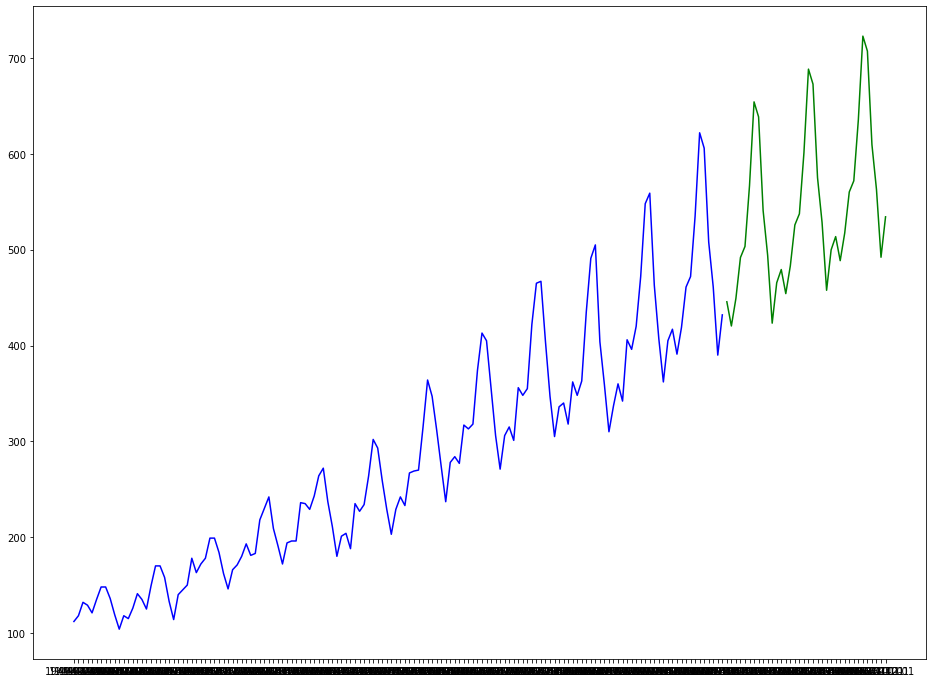

In [28]:
fig, axes = plt.subplots(1, 1, figsize=(16, 12))
axes.plot(air_passengers, color="blue") 
axes.plot(predicted_index, predicted, color='green')

<ipython-input-18-fa1fab0de539>:9: MatplotlibDeprecationWarning:

Passing the minor parameter of set_ticks() positionally is deprecated since Matplotlib 3.2; the parameter will become keyword-only two minor releases later.



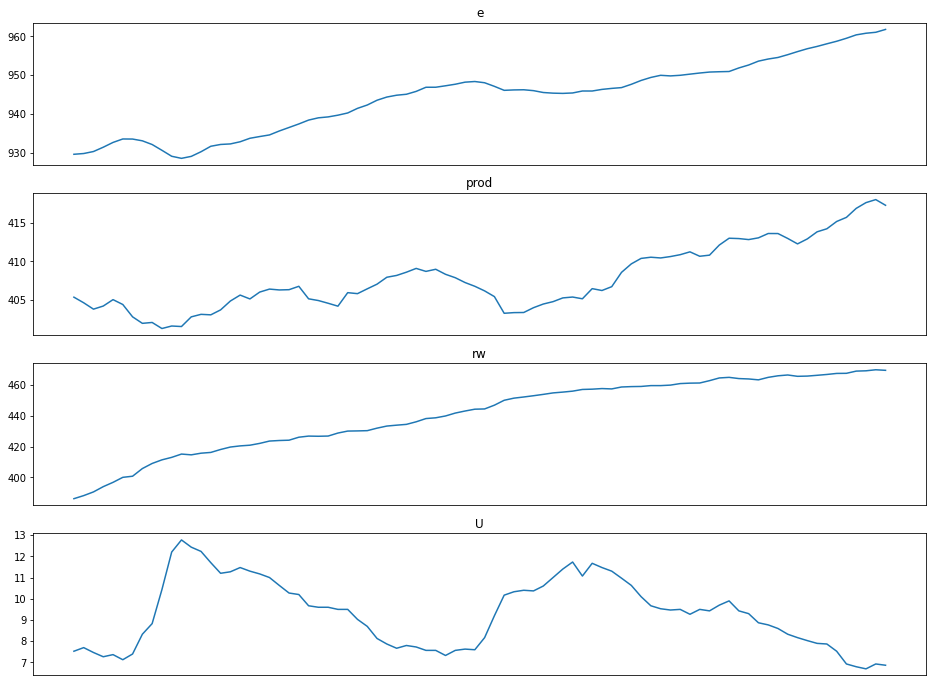

In [18]:
from statsmodels.tsa.api import VAR
canada = pd.read_csv("canada.csv", index_col = 0)
num_vars = canada.shape[1]
fig, axes = plt.subplots(num_vars ,1, figsize=(16, 12))
for i in range(num_vars):
    col = canada.columns[i]
    axes[i].plot(canada[col])
    #Removing ticks as they are very cluttered
    axes[i].set_xticks([],[])
    axes[i].set_title(col)

In [19]:
canada.head()

,e,prod,rw,U
Date,,,,
1980-01-01,929.610514,405.366466,386.136109,7.53
1980-04-01,929.803985,404.639834,388.135759,7.70
1980-07-01,930.318388,403.814883,390.540113,7.47
1980-10-01,931.427687,404.215773,393.963817,7.27
1981-01-01,932.662006,405.046714,396.764691,7.37


In [ ]:
model = VAR(canada)
var_selected = model.select_order(maxlags=10)
var_selected.summary()

In [10]:
model_fitted = model.fit(3)
model_fitted.summary()

  Summary of Regression Results   
Model:                         VAR
Method:                        OLS
Date:           Mon, 24, May, 2021
Time:                     15:17:07
--------------------------------------------------------------------
No. of Equations:         4.00000    BIC:                   -4.81164
Nobs:                     81.0000    HQIC:                  -5.73208
Log likelihood:          -150.609    FPE:                 0.00176850
AIC:                     -6.34882    Det(Omega_mle):     0.000975068
--------------------------------------------------------------------
Results for equation e
             coefficient       std. error           t-stat            prob
--------------------------------------------------------------------------
const        -150.687375        61.008888           -2.470           0.014
L1.e            1.752744         0.150818           11.622           0.000
L1.prod         0.169619         0.062282            2.723           0.006
L1.rw        

In [11]:
lag_order = model_fitted.k_ar
forecast_input = canada.values[-lag_order:]
months_to_predict = 24
predicted_values = model_fitted.forecast(forecast_input, months_to_predict)

In [12]:
canada_dates = [datetime.strptime(date,  '%Y-%m-%d') for date in canada.index]
last_date = canada_dates[-1]
predicted_dates = []
for _ in range(months_to_predict):
    next_date = last_date + relativedelta(months=3)
    predicted_dates.append(next_date)
    last_date = next_date
predicted_index = [date.strftime('%Y-%m-%d') for date in predicted_dates]

In [ ]:
fig, axes = plt.subplots(num_vars ,1, figsize=(16, 12))
for i in range(num_vars):
    col = canada.columns[i]
    axes[i].plot(canada[col], color="blue")
    axes[i].plot(predicted_index, predicted_values[:,i], color="green")
    #Removing ticks as they are very cluttered
    axes[i].set_xticks([],[])
    axes[i].set_title(col)